# 상관분석

In [15]:
import pandas as pd
import numpy as np

In [1]:
from sklearn import datasets
data = datasets.load_diabetes()

In [5]:
# data, target, feeature_names 세 가지 key만 사용한다.
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

데이터 형태의 길이가 같은지 확인

In [6]:
data['data'].shape

(442, 10)

In [7]:
data['target'].shape

(442,)

In [8]:
len(data['feature_names'])

10

In [11]:
# target이 당뇨병의 수치, 나머지 feature names에 속하는 age, sex, bmi등등이 변수이다.
# bmi(체질량지수) 변수와 당뇨병의 수치(target)가 어떤 관계를 가지는지 확인한다. 
df = pd.DataFrame(data['data'], index=data['target'], columns=data['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
132.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


## 산점도(Scatter plot)

In [49]:
X = df.bmi.values
Y = df.index.values

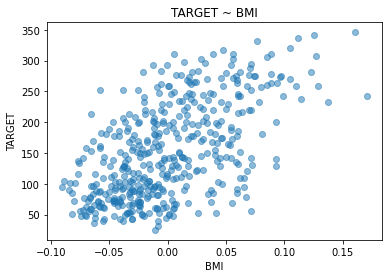

In [13]:
# 양의 상관관계를 이룬다. 
import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('TARGET ~ BMI')
plt.xlabel('BMI')
plt.ylabel('TARGET')
plt.show()

## 공분산
2개의 확률변수의 상관정도를 나타내는 값이다. 

In [18]:
# numpydml cov() 사용
cov = np.cov(X, Y)[0,1]
cov

2.1529144226397467

In [19]:
# 표준화 시킨 상관계수
corr = cov/(np.std(X)*np.std(Y))
corr

0.5877799533737244

In [21]:
# 상관계수 함수
def corr_np(X, Y):    
    cov = np.cov(X, Y)[0,1]  # 공분산
    corr = cov/(np.std(X)*np.std(Y))  # 표준화
    return corr

corr_np(X, Y)

0.5877799533737244

## 0인 값 테스트

In [64]:
li1 = [178, 190, 160, 18]
li2 = [60, 78, 49, 50]
inclue_zero = pd.DataFrame(li1)
inclue_zero[1] = li2
inclue_zero

,0,1
0,178,60
1,190,78
2,160,49
3,18,50


In [65]:
X = inclue_zero[0].values
Y = inclue_zero[1].values

In [66]:
corr_np(X, Y)

0.7808592103307632

## 상관분석 가정
* 이변량 정규분포 : 두 변수 중 적어도 하나의 변수는 정규본표여야 한다.
* 연속형 두 변수 간에는 선형적인 관계가 있어야 한다. (산점도를 그려본다.)

당뇨와 그에 영향을 미치는 변수들 간의 관계 분석 데이터

In [3]:
import pandas as pd
import numpy as np

from sklearn import datasets
data = datasets.load_diabetes()

In [13]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['target'] = data['target']
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


<AxesSubplot:>

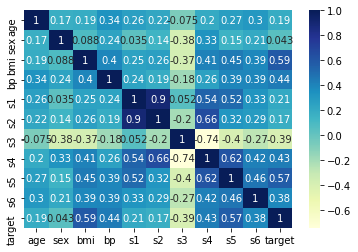

In [17]:
import seaborn as sns

sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

/Users/joseong-un/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joseong-un/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joseong-un/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joseong-un/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joseong-un/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joseong-un/opt/anaconda3/lib/pyth

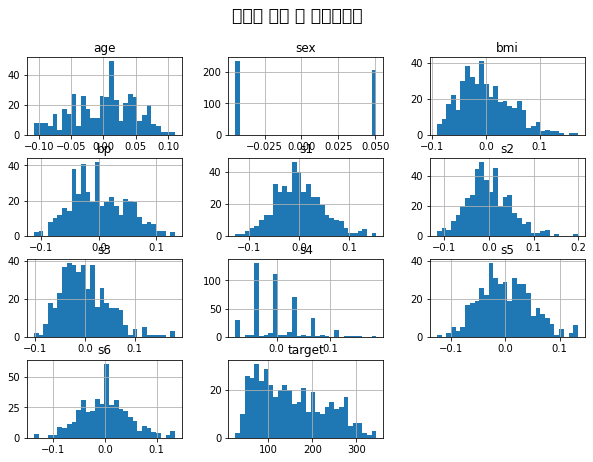

In [22]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,7), bins=30)
plt.suptitle("이상치 제거 전 히스토그램", size='xx-large')
plt.show()